In [61]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [63]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)

In [64]:
df = df[df['reversed_best'] == False]

In [65]:
df_best = df.sort_values(by='score').groupby('file_name').first()
# only keep after last "/" in index
df_best.index = df_best.index.map(lambda x: x[x.rfind('/') + 1:])

In [66]:
df_best

,rotation,max_val,rotation_reverse,max_val_reverse,score,reversed_diff,reversed_best,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse
file_name,,,,,,,,,,,,,,,
A231214_10300399.png,"roll: 344.00, pitch/theta/X: 47.79, yaw/phi/Y:...",128.548344,"roll: 344.00, pitch/theta/X: 47.79, yaw/phi/Y:...",126.658636,0.014299,-1.889708,False,rgb,344,47.787,-56.25,rgb,344,47.787,-56.25
A231214_10305286.png,"roll: 234.00, pitch/theta/X: 145.17, yaw/phi/Y...",125.687996,"roll: 234.00, pitch/theta/X: 145.17, yaw/phi/Y...",124.455971,0.017316,-1.232025,False,rgb,234,145.171,-69.75,rgb,234,145.171,-69.75
A231214_10312053.png,"roll: 112.00, pitch/theta/X: 262.62, yaw/phi/Y...",127.157174,"roll: 112.00, pitch/theta/X: 262.62, yaw/phi/Y...",126.400190,0.021630,-0.756984,False,rb,112,262.616,-76.05,rb,112,262.616,-76.05
A231214_10314883.png,"roll: 225.00, pitch/theta/X: 145.17, yaw/phi/Y...",131.653620,"roll: 225.00, pitch/theta/X: 145.17, yaw/phi/Y...",130.391188,0.024797,-1.262431,False,rgb,225,145.171,-69.75,rgb,225,145.171,-69.75
A231214_10321617.png,"roll: 26.00, pitch/theta/X: 128.04, yaw/phi/Y:...",98.844233,"roll: 26.00, pitch/theta/X: 128.04, yaw/phi/Y:...",98.672043,0.025288,-0.172190,False,rg,26,128.036,-27.45,rg,26,128.036,-27.45
A231214_10325450.png,"roll: 132.00, pitch/theta/X: 230.16, yaw/phi/Y...",123.792645,"roll: 132.00, pitch/theta/X: 230.16, yaw/phi/Y...",122.798348,0.024187,-0.994296,False,rb,132,230.155,-71.55,rb,132,230.155,-71.55
A231214_10332239.png,"roll: 211.00, pitch/theta/X: 145.17, yaw/phi/Y...",132.957266,"roll: 211.00, pitch/theta/X: 145.17, yaw/phi/Y...",131.861539,0.025361,-1.095727,False,rgb,211,145.171,-69.75,rgb,211,145.171,-69.75
A231214_10334779.png,"roll: 198.00, pitch/theta/X: 330.47, yaw/phi/Y...",47.573175,"roll: 198.00, pitch/theta/X: 330.47, yaw/phi/Y...",47.538373,0.017954,-0.034802,False,rgb,198,330.466,-35.55,rgb,198,330.466,-35.55
A231214_10341207.png,"roll: 119.00, pitch/theta/X: 230.16, yaw/phi/Y...",121.546945,"roll: 119.00, pitch/theta/X: 230.16, yaw/phi/Y...",120.744528,0.016983,-0.802418,False,rb,119,230.155,-71.55,rb,119,230.155,-71.55


In [67]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df_best.index = df_best.index.map(lambda x: files_idx[files.index(x)])

In [94]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['score', 'pitch', 'yaw', 'roll', 'channel']]

In [95]:
df_small

,score,pitch,yaw,roll,channel
file_name,,,,,
0,0.014299,47.787,-56.25,344,rgb
1,0.017316,145.171,-69.75,234,rgb
2,0.021630,262.616,-76.05,112,rb
3,0.024797,145.171,-69.75,225,rgb
4,0.025288,128.036,-27.45,26,rg
5,0.024187,230.155,-71.55,132,rb
6,0.025361,145.171,-69.75,211,rgb
7,0.017954,330.466,-35.55,198,rgb
8,0.016983,230.155,-71.55,119,rb


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

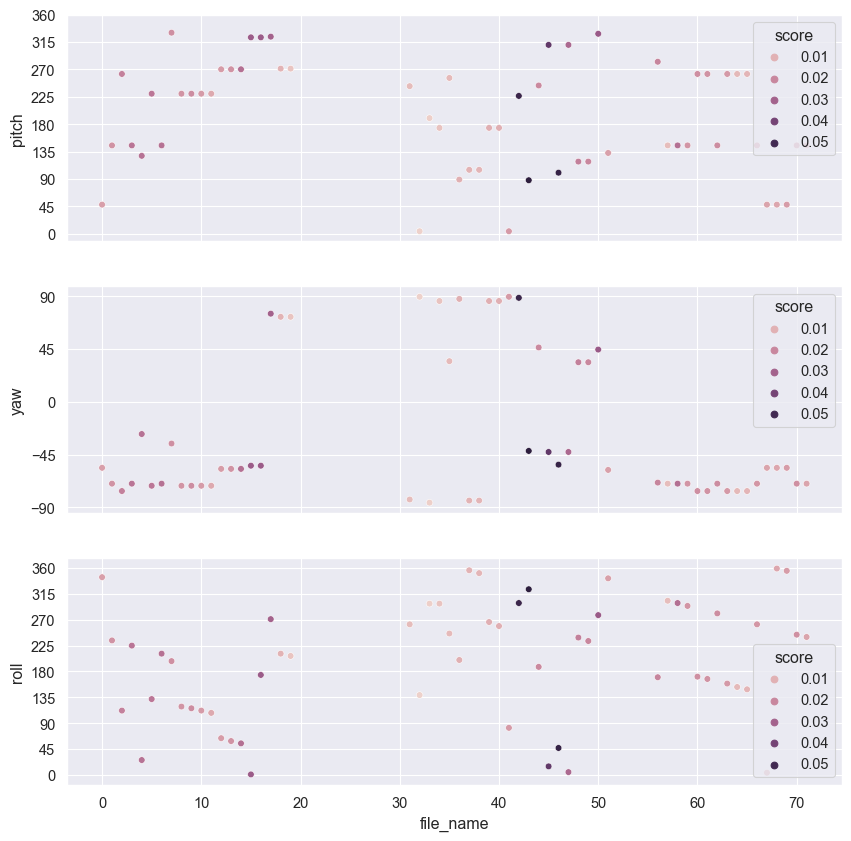

In [71]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [97]:
df_small.drop('channel', axis=1).to_csv("best_scores.csv")

In [98]:
import cv2 as cv

In [99]:
os.listdir('matching images')

['63.0.png',
 '5.0.png',
 '47.0.png',
 '45.0.png',
 '7.0.png',
 '19.0.png',
 '61.0.png',
 '58.0.png',
 '3.0.png',
 '.DS_Store',
 '65.0.png',
 '41.0.png',
 '39.0.png',
 '43.0.png',
 '67.0.png',
 '1.0.png',
 '44.0.png',
 '60.0.png',
 '18.0.png',
 '6.0.png',
 '4.0.png',
 '62.0.png',
 '46.0.png',
 '42.0.png',
 '0.0.png',
 '66.0.png',
 '64.0.png',
 '2.0.png',
 '59.0.png',
 '38.0.png',
 '40.0.png',
 '71.0.png',
 '34.0.png',
 '10.0.png',
 '68.0.png',
 '57.0.png',
 '12.0.png',
 '36.0.png',
 '32.0.png',
 '16.0.png',
 '8.0.png',
 '51.0.png',
 '14.0.png',
 '48.0.png',
 '13.0.png',
 '56.0.png',
 '37.0.png',
 '35.0.png',
 '70.0.png',
 '69.0.png',
 '11.0.png',
 '15.0.png',
 '50.0.png',
 '31.0.png',
 '49.0.png',
 '33.0.png',
 '9.0.png',
 '17.0.png']

In [100]:
# go trough all files in folder and according to the channel in df_small replace the file with only the channel
for file in os.listdir('matching images'):
    try:
        if file.endswith('.png'):
            channel = df_small['channel'][int(file[:file.find('.')])]
            img = cv.imread('matching images/' + file)
            blue_channel, green_channel, red_channel = cv.split(img)
            if channel == "rgb":
                img = cv.add(red_channel, cv.add(blue_channel, green_channel))
                cv.imwrite('matching images/' + file, img)
            elif channel == "rg":
                img = cv.add(red_channel, green_channel)
                cv.imwrite('matching images/' + file, img)
            elif channel == "rb":
                img = cv.add(red_channel, blue_channel)
                cv.imwrite('matching images/' + file, img)
            elif channel == "gb":
                img = cv.add(green_channel, blue_channel)
                cv.imwrite('matching images/' + file, img)
    except:
        print("could not find file " + file)
